In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('delhi.csv')
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [3]:
df.shape

(1259, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [5]:
df = df.drop(['Parking','Per_Sqft','Transaction'], axis=1)
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Price,Status,Type
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,6500000,Ready_to_move,Builder_Floor
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",5000000,Ready_to_move,Apartment
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",15500000,Ready_to_move,Apartment
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,4200000,Ready_to_move,Builder_Floor
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,6200000,Ready_to_move,Builder_Floor


In [6]:
df.isna().sum()

Area          0
BHK           0
Bathroom      2
Furnishing    5
Locality      0
Price         0
Status        0
Type          5
dtype: int64

In [7]:
# fill missing values
df['Bathroom'].value_counts()
df['Bathroom'] = df['Bathroom'].fillna(2.0)

df['Furnishing'].value_counts()
df['Furnishing'] = df['Furnishing'].fillna('Semi-Furnished')

df['Type'].value_counts()
df['Type'] = df['Type'].fillna('Builder_Floor')

In [8]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Price,Status,Type
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,6500000,Ready_to_move,Builder_Floor
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",5000000,Ready_to_move,Apartment
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",15500000,Ready_to_move,Apartment
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,4200000,Ready_to_move,Builder_Floor
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,6200000,Ready_to_move,Builder_Floor


In [9]:
# no of records per locality
# loc = df['Locality'].unique().tolist()
# loc

# req = []
# for i in loc:
#     if len(i) < 40:
#         req.append(i)

loc = df['Locality'].value_counts()[0:10]
loc
# plt.Figure(figsize=(15,10))
# loc.plot(kind='barh', color='brown')
# plt.title('No of records per locality')
# plt.xlabel('No of records')
# plt.ylabel('Locality')
# plt.show()



Lajpat Nagar 3                            34
Lajpat Nagar 2                            33
J R Designers Floors, Rohini Sector 24    31
Kailash Colony, Greater Kailash           30
Yamuna Vihar, Shahdara                    29
Laxmi Nagar                               25
Mehrauli                                  24
Chittaranjan Park                         24
Saket                                     21
Alaknanda                                 20
Name: Locality, dtype: int64

In [10]:
# adding price per area column
df['Price'] = df['Price']/100000.0
# two decimal places
df['Price_per_area'] = df['Price']*100000/df['Area']
df['Price_per_area'] = df['Price_per_area'].round(2)
# df.head()


In [11]:
df.describe()

,Area,BHK,Bathroom,Price,Price_per_area
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,1466.452724,2.796664,2.555203,213.067037,14582.160905
std,1568.055040,0.954425,1.041627,256.011545,20420.174531
min,28.000000,1.000000,1.000000,10.000000,204.080000
25%,800.000000,2.000000,2.000000,57.000000,6757.355000
50%,1200.000000,3.000000,2.000000,142.000000,11666.670000
75%,1700.000000,3.000000,3.000000,255.000000,17549.710000
max,24300.000000,10.000000,7.000000,2400.000000,538461.540000


In [12]:
df.shape

(1259, 9)

In [13]:
df.head()
# remove spaces from locality   
df['Locality'] = df['Locality'].apply(lambda x: x.strip())
location_count = df['Locality'].value_counts()

In [14]:
location_count_less_than_1 = location_count[location_count<=1]
location_count_less_than_1
# removing less than 1 count localities
df['Locality'] = df['Locality'].apply(lambda x: 'other' if x in location_count_less_than_1 else x)
df['Locality'].value_counts()

other                                             194
Lajpat Nagar 3                                     34
Lajpat Nagar 2                                     33
J R Designers Floors, Rohini Sector 24             31
Kailash Colony, Greater Kailash                    30
                                                 ... 
Shastri Park, Shahdara                              2
Seelampur, Shahdara                                 2
Ganga Apartment Sector D Pocket 6, Vasant Kunj      2
Baljit Nagar, Patel Nagar                           2
Nehru Enclave, Kalkaji                              2
Name: Locality, Length: 172, dtype: int64

In [15]:
df.describe()

,Area,BHK,Bathroom,Price,Price_per_area
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,1466.452724,2.796664,2.555203,213.067037,14582.160905
std,1568.055040,0.954425,1.041627,256.011545,20420.174531
min,28.000000,1.000000,1.000000,10.000000,204.080000
25%,800.000000,2.000000,2.000000,57.000000,6757.355000
50%,1200.000000,3.000000,2.000000,142.000000,11666.670000
75%,1700.000000,3.000000,3.000000,255.000000,17549.710000
max,24300.000000,10.000000,7.000000,2400.000000,538461.540000


In [16]:
df.shape

(1259, 9)

In [17]:
# remove Price_per_area outliers

def remove_ppa_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Locality'):
        m = np.mean(subdf.Price_per_area)
        st = np.std(subdf.Price_per_area)
        reduced_df = subdf[(subdf.Price_per_area>(m-st)) & (subdf.Price_per_area<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df = remove_ppa_outliers(df)
df.describe()

,Area,BHK,Bathroom,Price,Price_per_area
count,871.000000,871.000000,871.000000,871.000000,871.000000
mean,1384.694824,2.756602,2.525832,200.263375,12809.253731
std,1035.021743,0.929961,1.042306,221.653804,8666.685870
min,45.000000,1.000000,1.000000,10.000000,204.080000
25%,800.000000,2.000000,2.000000,58.000000,6800.000000
50%,1200.000000,3.000000,2.000000,135.000000,11616.160000
75%,1650.000000,3.000000,3.000000,260.000000,17265.800000
max,14220.000000,7.000000,7.000000,1900.000000,122222.220000


In [18]:
def BHK_ouliters(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Locality'):
        BHK_stats = {}
        for BHK, BHK_df in location_df.groupby('BHK'):
            BHK_stats[BHK] = {
                'mean': np.mean(BHK_df.Price_per_area),
                'std': np.std(BHK_df.Price_per_area),
                'count': BHK_df.shape[0]
            }
        for BHK, BHK_df in location_df.groupby('BHK'):
            stats = BHK_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, BHK_df[BHK_df.Price_per_area<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df = BHK_ouliters(df)
df.shape


(770, 9)

In [19]:
df.describe()

,Area,BHK,Bathroom,Price,Price_per_area
count,770.000000,770.000000,770.000000,770.000000,770.000000
mean,1379.998950,2.724675,2.541558,208.437532,13404.617753
std,1060.180259,0.942861,1.059461,229.030604,8937.674591
min,45.000000,1.000000,1.000000,10.000000,204.080000
25%,800.000000,2.000000,2.000000,60.000000,7392.102500
50%,1200.000000,3.000000,2.000000,144.000000,12089.285000
75%,1620.000000,3.000000,3.000000,260.000000,17890.207500
max,14220.000000,7.000000,7.000000,1900.000000,122222.220000


In [20]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Price,Status,Type,Price_per_area
0,1470.0,3,2.0,Semi-Furnished,"Aashirwaad Chowk, Dwarka",145.0,Ready_to_move,Apartment,9863.95
1,1500.0,3,2.0,Semi-Furnished,"Aashirwaad Chowk, Dwarka",149.0,Ready_to_move,Apartment,9933.33
2,1700.0,3,3.0,Semi-Furnished,"Aashirwaad Chowk, Dwarka",172.0,Ready_to_move,Apartment,10117.65
3,1350.0,4,4.0,Semi-Furnished,"Abhimanyu Apartments, Vasundhara Enclave",105.0,Ready_to_move,Apartment,7777.78
4,1450.0,3,3.0,Semi-Furnished,"Abhimanyu Apartments, Vasundhara Enclave",116.0,Ready_to_move,Apartment,8000.00


In [21]:
df = df.drop(['Price_per_area','Type','Status','Furnishing'], axis=1)


In [22]:
df.rename(columns = {'Area':'Total_sqft', 'Locality':'location', 'Bathroom':'bath', 'BHK':'bhk'}, inplace = True)
df.head()

,Total_sqft,bhk,bath,location,Price
0,1470.0,3,2.0,"Aashirwaad Chowk, Dwarka",145.0
1,1500.0,3,2.0,"Aashirwaad Chowk, Dwarka",149.0
2,1700.0,3,3.0,"Aashirwaad Chowk, Dwarka",172.0
3,1350.0,4,4.0,"Abhimanyu Apartments, Vasundhara Enclave",105.0
4,1450.0,3,3.0,"Abhimanyu Apartments, Vasundhara Enclave",116.0


In [23]:
df['location'].unique()

array(['Aashirwaad Chowk, Dwarka',
       'Abhimanyu Apartments, Vasundhara Enclave',
       'Abul Fazal Enclave Part 1, Okhla',
       'Abul Fazal Enclave Part-II, Okhla', 'Alaknanda',
       'Amar Colony, Lajpat Nagar', 'Andheria Mor, Mehrauli',
       'Arjun Nagar, Safdarjung Enclave', 'Baljit Nagar, Patel Nagar',
       'Bank Apartments, Aashirwaad Chowk, Dwarka', 'Batla House, Okhla',
       'Bhagwan Das Nagar, Punjabi Bagh', 'Budh Vihar',
       'Budh Vihar Phase 1', 'Budh Vihar Phase 2', 'Chhattarpur',
       'Chhattarpur Enclave Phase2', 'Chittaranjan Park',
       'Chopra Apartment, Dwarka Sector 23',
       'Common Wealth Games Village, Commonwealth Games Village 2010',
       'Commonwealth Games Village 2010',
       'DDA Flats Block A, Dilshad Garden', 'DDA Flats Pocket 3, Narela',
       'DDA Flats Pocket 6 Sector A10, Narela',
       'DDA Flats Sarita Vihar, Sarita Vihar Pocket K',
       'DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road',
       'DDA Flats Sector E Poc

Cleaned data


In [24]:
df.to_csv('delhi_cleaned.csv', index=False)
df_clean = pd.read_csv('delhi_cleaned.csv')

In [25]:
df_clean.describe()

,Total_sqft,bhk,bath,Price
count,770.000000,770.000000,770.000000,770.000000
mean,1379.998950,2.724675,2.541558,208.437532
std,1060.180259,0.942861,1.059461,229.030604
min,45.000000,1.000000,1.000000,10.000000
25%,800.000000,2.000000,2.000000,60.000000
50%,1200.000000,3.000000,2.000000,144.000000
75%,1620.000000,3.000000,3.000000,260.000000
max,14220.000000,7.000000,7.000000,1900.000000


Location extracting

In [26]:
#apply one hot encoding in location column
dummies = pd.get_dummies(df.location)
location_cat = pd.get_dummies(df.location)
dummies.head()

,"Aashirwaad Chowk, Dwarka","Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla",Alaknanda,"Amar Colony, Lajpat Nagar","Andheria Mor, Mehrauli","Arjun Nagar, Safdarjung Enclave","Baljit Nagar, Patel Nagar","Bank Apartments, Aashirwaad Chowk, Dwarka",...,"The Leela Sky Villas, Patel Nagar",Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasant Kunj Sector C,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Yamuna Vihar, Shahdara",other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df = pd.concat([df,dummies],axis='columns')
df.head()

,Total_sqft,bhk,bath,location,Price,"Aashirwaad Chowk, Dwarka","Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla",Alaknanda,...,"The Leela Sky Villas, Patel Nagar",Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasant Kunj Sector C,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Yamuna Vihar, Shahdara",other
0,1470.0,3,2.0,"Aashirwaad Chowk, Dwarka",145.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1500.0,3,2.0,"Aashirwaad Chowk, Dwarka",149.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1700.0,3,3.0,"Aashirwaad Chowk, Dwarka",172.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1350.0,4,4.0,"Abhimanyu Apartments, Vasundhara Enclave",105.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1450.0,3,3.0,"Abhimanyu Apartments, Vasundhara Enclave",116.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df = df.drop('location', axis='columns')

In [29]:
df.head()

,Total_sqft,bhk,bath,Price,"Aashirwaad Chowk, Dwarka","Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla",Alaknanda,"Amar Colony, Lajpat Nagar",...,"The Leela Sky Villas, Patel Nagar",Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasant Kunj Sector C,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Yamuna Vihar, Shahdara",other
0,1470.0,3,2.0,145.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1500.0,3,2.0,149.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1700.0,3,3.0,172.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1350.0,4,4.0,105.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1450.0,3,3.0,116.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# convert to float
df['bhk'] = df['bhk'].astype(float)
df.head()


,Total_sqft,bhk,bath,Price,"Aashirwaad Chowk, Dwarka","Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla",Alaknanda,"Amar Colony, Lajpat Nagar",...,"The Leela Sky Villas, Patel Nagar",Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasant Kunj Sector C,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Yamuna Vihar, Shahdara",other
0,1470.0,3.0,2.0,145.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1500.0,3.0,2.0,149.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1700.0,3.0,3.0,172.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1350.0,4.0,4.0,105.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1450.0,3.0,3.0,116.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Model Building

In [31]:
X = df.drop(['Price'], axis=1) # input variable
Y = df['Price'] # target variable

In [32]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape)

(616, 143) (154, 143)


Applying Linear Regression

In [34]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [35]:
y_pred_lr = lr.predict(X_test) 
r2_score(Y_test, y_pred_lr)
# mean_squared_error(Y_test,y_pred_lr)

-385152268481732.56

Lasso Regression

In [36]:
lasso = Lasso()
lasso.fit(X_train, Y_train)

Lasso()

In [37]:
y_pred_lasso = lasso.predict(X_test)
r2_score(Y_test, y_pred_lasso)

0.7541991407607053

Apply Ridge Regression

In [38]:
Ridge = Ridge()
Ridge.fit(X_train, Y_train)

Ridge()

In [39]:
y_pred_ridge = Ridge.predict(X_test)
r2_score(Y_test, y_pred_ridge)

0.8024521407486329

Apply xgboost

In [40]:
xg = XGBRegressor()
xg.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [41]:
y_pred_xg = xg.predict(X_test)
r2_score(Y_test, y_pred_xg)

0.7979806818113442

Apply catboostRegressor

In [42]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(X_train, Y_train)

Learning rate set to 0.037926
0:	learn: 230.5646159	total: 146ms	remaining: 2m 26s
1:	learn: 225.1752221	total: 148ms	remaining: 1m 13s
2:	learn: 219.7165458	total: 149ms	remaining: 49.5s
3:	learn: 214.8487972	total: 150ms	remaining: 37.4s
4:	learn: 209.7718447	total: 152ms	remaining: 30.2s
5:	learn: 204.7617235	total: 153ms	remaining: 25.4s
6:	learn: 199.8306030	total: 154ms	remaining: 21.9s
7:	learn: 195.0136158	total: 156ms	remaining: 19.3s
8:	learn: 190.4786416	total: 157ms	remaining: 17.3s
9:	learn: 186.3157505	total: 158ms	remaining: 15.7s
10:	learn: 182.2979925	total: 160ms	remaining: 14.3s
11:	learn: 178.7691452	total: 161ms	remaining: 13.2s
12:	learn: 174.8357854	total: 162ms	remaining: 12.3s
13:	learn: 171.3475656	total: 163ms	remaining: 11.5s
14:	learn: 167.8684972	total: 165ms	remaining: 10.8s
15:	learn: 164.4103716	total: 166ms	remaining: 10.2s
16:	learn: 161.1164938	total: 167ms	remaining: 9.69s
17:	learn: 157.8175957	total: 169ms	remaining: 9.21s
18:	learn: 154.9671365	t

In [43]:
y_pred_cat = cat.predict(X_test)
r2_score(Y_test, y_pred_cat)

0.8739517990914683

Apply random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor()
rdf.fit(X_train, Y_train)

RandomForestRegressor()

In [45]:
y_pred_rdf = rdf.predict(X_test)
r2_score(Y_test, y_pred_rdf)

0.7777302359156423

In [46]:
len(X.columns)

143

In [47]:
# copy the model cat
import pickle
# with open('delhi_model.pkl', 'wb') as f:
#     pickle.dump(cat, f)


In [48]:
# here X = df.drop(['Price'], axis=1)
index_dict = dict(zip(X.columns,range(X.shape[1])))
# print(index_dict)
# with open('index_dict', 'wb') as fid:
#     pickle.dump(index_dict, fid,2) 

In [49]:
#save the column name
location_list = list(zip(location_cat.columns,range(X.shape[1])))
# print(location_list)

In [50]:
# with open('location_cat', 'wb') as fid:
#     pickle.dump(location_list, fid,2) 

In [51]:
def predict(location,area,size,bath):
    output = np.zeros(151)
    output[0] = area
    output[1] = size
    output[2] = bath
    
    result_location = location
    if result_location not in location_cat:
        output[146] = 1
    else:
        output[index_dict[str(location)]] = 1
    
    return cat.predict([output])[0]

In [52]:
# predict
predict('Uttam Nagar',2000,3,3)

323.69619410440544

In [53]:
df.head()

,Total_sqft,bhk,bath,Price,"Aashirwaad Chowk, Dwarka","Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla",Alaknanda,"Amar Colony, Lajpat Nagar",...,"The Leela Sky Villas, Patel Nagar",Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasant Kunj Sector C,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Yamuna Vihar, Shahdara",other
0,1470.0,3.0,2.0,145.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1500.0,3.0,2.0,149.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1700.0,3.0,3.0,172.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1350.0,4.0,4.0,105.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1450.0,3.0,3.0,116.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


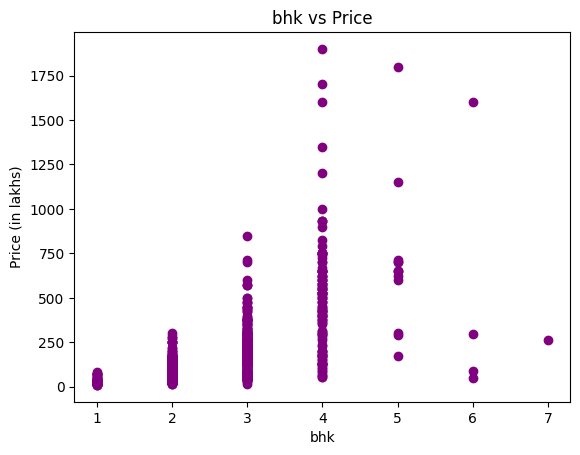

In [54]:
# price vs bath bar graph
import matplotlib.pyplot as plt
plt.scatter(df['bhk'],df['Price'],color='purple')
plt.xlabel('bhk')
plt.ylabel('Price (in lakhs)')
plt.title('bhk vs Price')
plt.show()


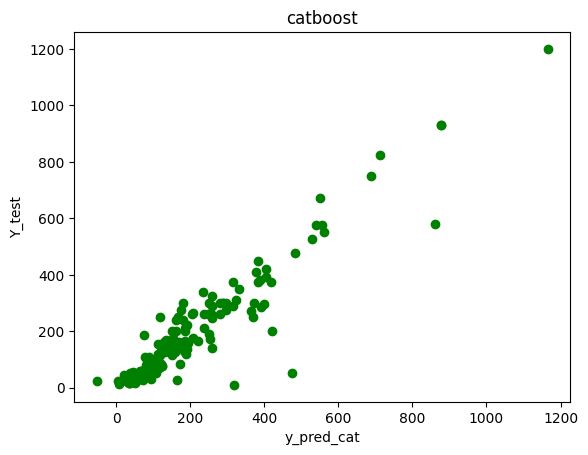

In [55]:
# graph for catboost

plt.scatter(y_pred_cat,Y_test,color='green')
plt.xlabel('y_pred_cat')
plt.ylabel('Y_test')
plt.title('catboost')
plt.show()

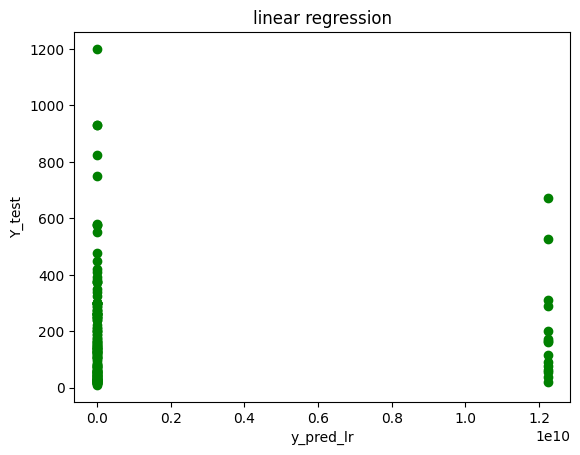

In [56]:

plt.scatter(y_pred_lr,Y_test,color='green')
plt.xlabel('y_pred_lr')
plt.ylabel('Y_test')
plt.title('linear regression')
plt.show()

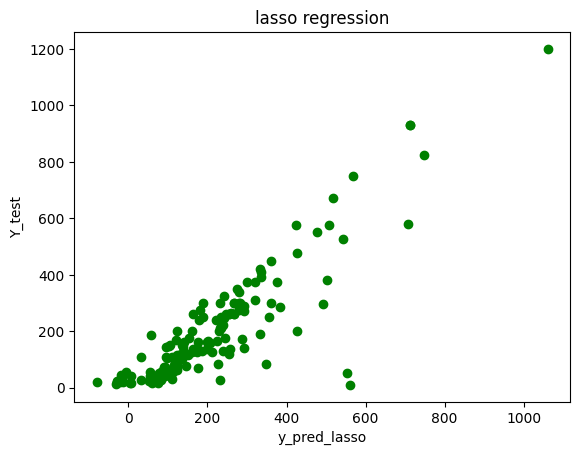

In [57]:
plt.scatter(y_pred_lasso,Y_test,color='green')
plt.xlabel('y_pred_lasso')
plt.ylabel('Y_test')
plt.title('lasso regression')
plt.show()

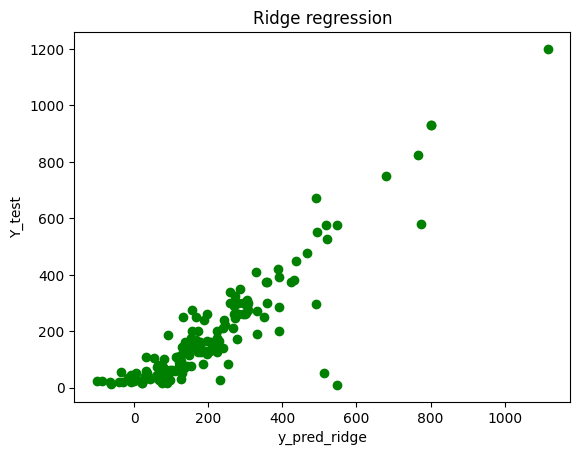

In [58]:
plt.scatter(y_pred_ridge,Y_test,color='green')
plt.xlabel('y_pred_ridge')
plt.ylabel('Y_test')
plt.title('Ridge regression')
plt.show()

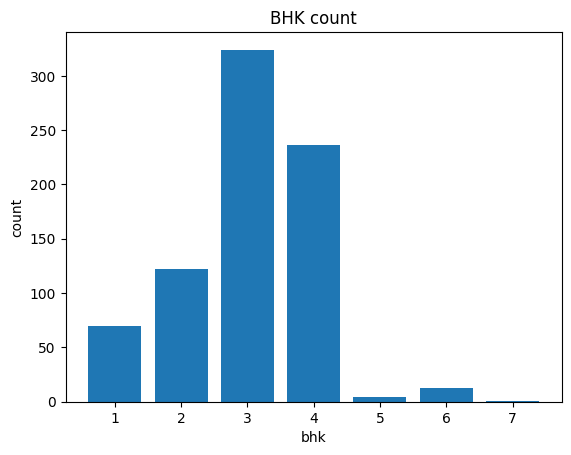

In [59]:
# no of bhk bar graph
plt.bar(df['bhk'].unique(),df.bhk.value_counts())
plt.xlabel('bhk')
plt.ylabel('count')
plt.title('BHK count')
plt.show()

In [60]:
df.head()

,Total_sqft,bhk,bath,Price,"Aashirwaad Chowk, Dwarka","Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla",Alaknanda,"Amar Colony, Lajpat Nagar",...,"The Leela Sky Villas, Patel Nagar",Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasant Kunj Sector C,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Yamuna Vihar, Shahdara",other
0,1470.0,3.0,2.0,145.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1500.0,3.0,2.0,149.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1700.0,3.0,3.0,172.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1350.0,4.0,4.0,105.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1450.0,3.0,3.0,116.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


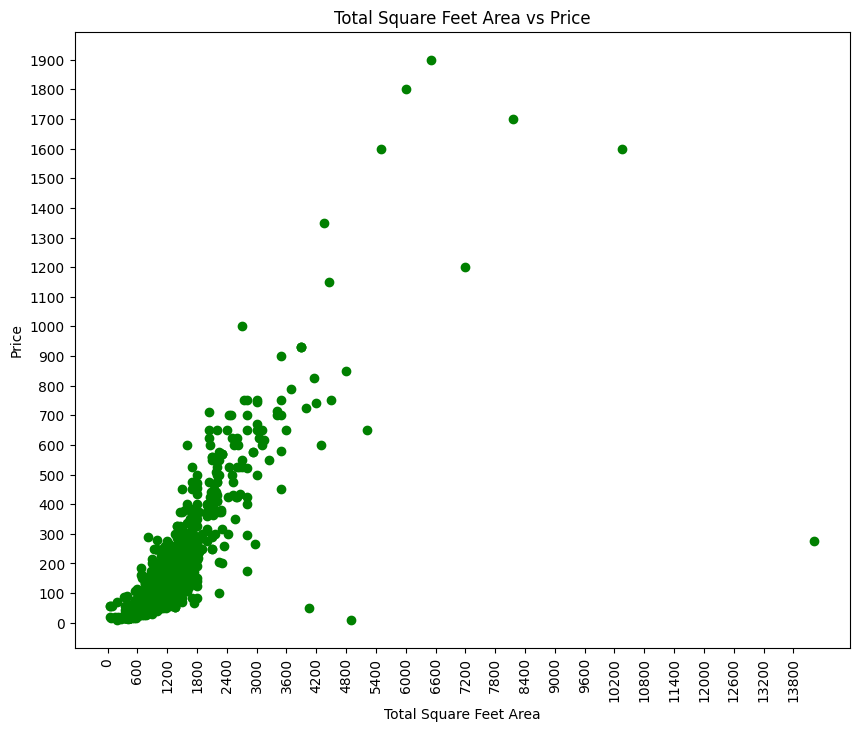

In [61]:
plt.figure(figsize=(10,8))
plt.scatter(df.Total_sqft,df.Price,color = "green")
plt.xlabel("Total Square Feet Area")
plt.ylabel("Price")
plt.title("Total Square Feet Area vs Price")
plt.xticks(np.arange(0, 14000, 600))
plt.yticks(np.arange(0, 2000, 100))
plt.xticks(rotation=90)
plt.show()

In [62]:
# plt = df.groupby('bhk')['bath'].value_counts()[0:13].plot(kind='bar', figsize=(8,5), color='blue')
# plt.set_xlabel('bhk and bath')
# plt.set_ylabel('count')
# plt.set_title('Number of bath per bhk')

In [63]:
# print r2 score
print('r2_score of lasso regression is',r2_score(Y_test, y_pred_lasso))
print('r2_score of ridge regression is',r2_score(Y_test, y_pred_ridge))
print('r2_score of catboost regression is',r2_score(Y_test, y_pred_cat))
print('r2_score of random forest regression is',r2_score(Y_test, y_pred_rdf))
print('r2_score of XGBoost regression is',r2_score(Y_test, y_pred_xg))


r2_score of lasso regression is 0.7541991407607053
r2_score of ridge regression is 0.8024521407486329
r2_score of catboost regression is 0.8739517990914683
r2_score of random forest regression is 0.7777302359156423
r2_score of XGBoost regression is 0.7979806818113442


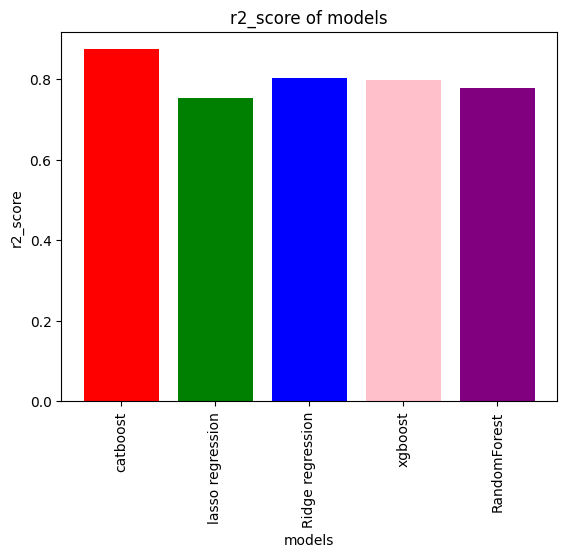

In [64]:
# r2_score bar graph of models
plt.bar(['catboost','lasso regression','Ridge regression', 'xgboost', 'RandomForest'],
[r2_score(Y_test, y_pred_cat),
r2_score(Y_test, y_pred_lasso),
r2_score(Y_test, y_pred_ridge),
r2_score(Y_test, y_pred_xg),
r2_score(Y_test, y_pred_rdf)],
color=['red','green','blue','pink','purple'])
plt.xlabel('models')
plt.ylabel('r2_score')
plt.title('r2_score of models')
plt.xticks(rotation = "vertical")
plt.show()